## Import case

In [1]:
import andes
import numpy as np
from andes.interop.pandapower import to_pandapower, make_link_table, runopp_map
from andes.interop.pandapower import add_gencost, build_group_table
andes.config_logger(stream_level=20)

import pandas as pd
import pandapower as pp
from math import ceil, floor

import os

import matplotlib.pyplot as plt

import scipy.stats as stat

from jams import rted2, dcopf

Package version

In [2]:
print(andes.__version__)
print(pp.__version__)

1.6.3.post158.dev0+g9a158e97
2.7.0


Import ADNES case

In [3]:
# ss0 is used for PP conversion
dir_path = os.path.abspath('..')
case_path = '/case/ieee39_ev2.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

Working directory: "/home/jwang175/andes/jwang/notes2"
> Loaded config from file "/home/jwang175/.andes/andes.rc"
> Loaded generated Python code in "/home/jwang175/.andes/pycode".
Parsing input file "/home/jwang175/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.1937 seconds.
ACEc <1> added BusFreq <BusFreq_11> linked to bus <1>
System internal structure set up in 0.0460 seconds.


In [4]:
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ssa.PQ.pq2z = 0

In [5]:
ssa.PFlow.run()
ssa.TDS.config.tf = 2
ssa.TDS.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1143 seconds.
0: |F(x)| = 7.561234474
1: |F(x)| = 2.917614383
2: |F(x)| = 0.1314910739
3: |F(x)| = 0.0003602307832
4: |F(x)| = 4.342665338e-09
Converged in 5 iterations in 0.0081 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-2 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
Numba compilation initiated with caching.
GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.012  | 0.001
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_8  | 0.029  | 0.006
 GENROU_9  |

  0%|          | 0/100 [00:00<?, ?%/s]

Simulation completed in 0.0656 seconds.


True

In [6]:
p0 = ssa.PQ.get(src='p0', idx='PQ_3')
print(p0)
ssa.PQ.set(src='Ppf', idx='PQ_3', value=p0*2, attr='v')

2.338


True

In [7]:
ssa.TDS.config.tf = 20
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

Simulation completed in 1.4103 seconds.


True

In [9]:
pref0 = ssa.TGOV1N.get(src='pref0', idx='TGOV1_4')
print(pref0)
ssa.TurbineGov.set(src='pref0', idx='TGOV1_4', value=p0 + pref0, attr='v')

6.528135674757314


True

In [10]:
ssa.TDS.config.tf = 40
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

Simulation completed in 2.1292 seconds.


True

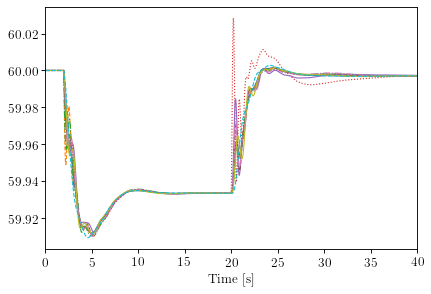

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [11]:
ssa.TDS.plt.plot(ssa.GENROU.omega,ytimes=60)